In [1]:
#import the library used to query a website
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_data_from_internet():
    #specify the url for 2017
    years = ["archive-2021","archive-2020","archive-2019","archive-2018","archive-2017","archive-2016","archive-2015",
              "archive-2013","archive-2012","archive-2011","archive-2010","archive-2009","archive-2008","archive-2007",
              "archive-2006","archive-2005","archive-2004","archive-2003","archive-2002","archive-2001","archive-2000",
              "archive-1999","archive-1998","archive-1997","archive-1996","archive-1995","archive-1994","archive-1993",
              "archive-1992","archive-1991","archive-1990","archive-1989","archive-1988"]

    yearlist = list()
    yearlistbonus = list()
    ano =1
    for year in years:
        lottery = "https://www.irishlottery.com/"+year
        #Query the website and return the html to the variable 'page'
        page = requests.get(lottery)
        soup = BeautifulSoup(page.content, 'html5lib')

        #print(soup)

        ball_class = soup.find_all(class_='ball')
        bonusball = soup.find_all(class_='bonus-ball')
        if not bonusball:
            bonusball = ['0']*(len(ball_class)//6)
        yearlistbonus.append(bonusball)
        #print(ano ,len(ball_class)//6, len(bonusball),bonusball)
        yearlist.append(ball_class)
        ano+=1
        if ano == 29:
            break
    return yearlist, yearlistbonus



In [3]:
def processa_dados(yearlist, yearlistbonus):

    mat = list()
    val = list()
    valbonus =list()
    str_remove = r'\W+\D+'

    #montagem do vetor de bolas bonus
    for y in yearlistbonus:
        for bn in y:
            valbonus.append(int(re.sub(str_remove, '', str(bn))))

    for y in yearlist:
        for b in y:
            val.append(re.sub(str_remove, '', str(b)))

    #montagem da matriz de dados das bolas de 1 a 6
    for b in range(0, len(val), 6):
        mat.append(val[b:b+6])

    return mat, valbonus


def createDataframe(mat,valbonus):
    vec = pd.Series(valbonus)
    df = pd.DataFrame(mat)
    columns = ["ball_one", "ball_two", "ball_three", "ball_four", "ball_five", "ball_six"]
    df.columns = columns
    df.insert(6, "bonusball", vec, True)
    return df


def readdataframe(filename):

    return pd.read_csv(filename, sep=';')

In [5]:
yearlist, yearlistbonus = get_data_from_internet()
mat, valbonus = processa_dados(yearlist, yearlistbonus)
df = createDataframe(mat, valbonus)
print(df)

     ball_one ball_two ball_three ball_four ball_five ball_six  bonusball
0          12       17         18        21        33       37         23
1           6       18         27        33        37       45         42
2           3        7         11        28        31       43         46
3           4       11         16        21        36       40          8
4           9       14         22        24        37       44         45
...       ...      ...        ...       ...       ...      ...        ...
2907        1        3          6         9        13       28         33
2908        1        3         13        19        26       37         31
2909        6        9         16        33        37       38         27
2910        4        9         10        14        15       30         16
2911        5        9         16        24        29       31         15

[2912 rows x 7 columns]


In [6]:
df.to_csv("loteriairlandesa.csv",sep=';',index=False)



In [9]:
df = pd.read_csv("loteriairlandesa.csv",sep=';')
print(df)


      ball_one  ball_two  ball_three  ball_four  ball_five  ball_six  \
0           12        17          18         21         33        37   
1            6        18          27         33         37        45   
2            3         7          11         28         31        43   
3            4        11          16         21         36        40   
4            9        14          22         24         37        44   
...        ...       ...         ...        ...        ...       ...   
2907         1         3           6          9         13        28   
2908         1         3          13         19         26        37   
2909         6         9          16         33         37        38   
2910         4         9          10         14         15        30   
2911         5         9          16         24         29        31   

      bonusball  
0            23  
1            42  
2            46  
3             8  
4            45  
...         ...  
2907     

In [54]:
columns5 = ["ball_one", "ball_two", "ball_three", "ball_four", "ball_five", "ball_six"]
df["sum_six_ball"] = df[columns5].sum(axis=1)


columns6 = ["ball_one", "ball_two", "ball_three", "ball_four", "ball_five", "ball_six", "bonusball"]
df["sum_allballs"] = df[columns6].sum(axis=1)

print(df["sum_six_ball"].mean(),df["sum_allballs"].mean())

df["sum_six_ball_std"]= df["sum_six_ball"].std()
df["sum_allballs_std"]= df["sum_allballs"].std()
print(df)


133.13701923076923 155.41071428571428
      ball_one  ball_two  ball_three  ball_four  ball_five  ball_six  \
0           12        17          18         21         33        37   
1            6        18          27         33         37        45   
2            3         7          11         28         31        43   
3            4        11          16         21         36        40   
4            9        14          22         24         37        44   
...        ...       ...         ...        ...        ...       ...   
2907         1         3           6          9         13        28   
2908         1         3          13         19         26        37   
2909         6         9          16         33         37        38   
2910         4         9          10         14         15        30   
2911         5         9          16         24         29        31   

      bonusball  sum_six_ball  sum_allballs  sum_six_ball_std  \
0            23           138   

Text(0, 0.5, 'contagem')

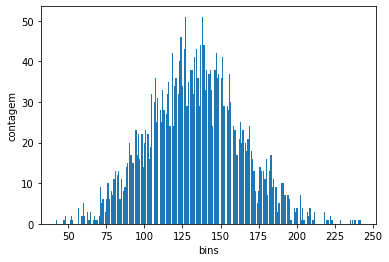

In [51]:
hist = df["sum_six_ball"].tolist()
plt.hist(hist, bins=250)
plt.xlabel("bins")
plt.ylabel("contagem")

Text(0, 0.5, 'contagem')

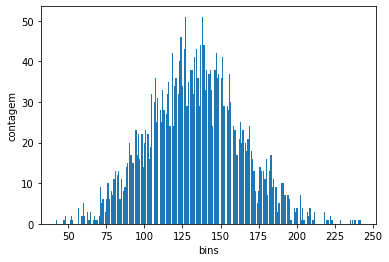

In [52]:
hist2 = df["sum_allballs"].tolist()
plt.hist(hist, bins=250)
plt.xlabel("bins")
plt.ylabel("contagem")

In [38]:
from random import randint

def gera6numeros(qte=10,menorvalor=125,maiorvalor=155):

    total = 0
    apostas = list()
    while total<qte:
        
        aposta = [randint(1,48) for i in range(6)]
        apostaset = set(aposta)
        if len(apostaset) == 6 and menorvalor < sum(aposta) < maiorvalor:
            aposta.sort()
            apostas.append(aposta)
            total = len(apostas)
    
    return apostas


In [42]:
for i in gera6numeros():
    print(f'{i} = {sum(i)}')

[4, 11, 19, 30, 33, 40] = 137
[5, 6, 18, 25, 36, 47] = 137
[2, 13, 14, 30, 38, 39] = 136
[11, 12, 15, 24, 36, 39] = 137
[1, 7, 19, 21, 38, 48] = 134
[6, 15, 21, 23, 41, 45] = 151
[4, 8, 19, 26, 35, 41] = 133
[5, 10, 14, 33, 34, 47] = 143
[13, 16, 17, 29, 31, 43] = 149
[7, 10, 18, 27, 28, 38] = 128


In [45]:
def gera7numeros(qte=10,menorvalor=125,maiorvalor=155):
    
    total = 0
    apostas = list()
    while total<qte:
        
        aposta = [randint(1,48) for i in range(7)]
        apostaset = set(aposta)
        if len(apostaset) == 7 and menorvalor < sum(aposta) < maiorvalor:
            aposta.sort()
            apostas.append(aposta)
            total = len(apostas)
    
    return apostas


In [46]:
for i in gera7numeros():
    print(f'{i} = {sum(i)}')

[8, 11, 15, 22, 26, 27, 39] = 148
[7, 8, 15, 18, 24, 30, 40] = 142
[3, 7, 15, 20, 28, 36, 43] = 152
[8, 9, 11, 13, 14, 27, 48] = 130
[3, 11, 13, 14, 25, 34, 39] = 139
[2, 5, 6, 16, 17, 39, 48] = 133
[3, 10, 14, 15, 20, 35, 37] = 134
[5, 10, 13, 19, 30, 33, 36] = 146
[8, 16, 19, 20, 22, 28, 37] = 150
[9, 12, 19, 20, 22, 29, 33] = 144
